- (Multi-Obj tut: https://ax.dev/tutorials/multiobjective_optimization.html)
- Multi-task, AxClient: 
    - https://ac-microcourses.readthedocs.io/en/latest/courses/data-science/2.5-multi-task.html
    - https://github.com/facebook/Ax/issues/2546
- Test functions: (https://www.sfu.ca/~ssurjano/optimization.html)

Use proper transform
- https://ax.dev/api/modelbridge.html
- https://ax.dev/versions/0.1.8/tutorials/building_blocks.html

In [1]:
# load the Advanced Optimization from AC huggingface
from gradio_client import Client
client = Client("AccelerationConsortium/crabnet-hyperparameter")

import numpy as np
import pandas as pd
from ax.core.observation import ObservationFeatures
from ax.modelbridge.generation_strategy import GenerationStep, GenerationStrategy
from ax.modelbridge.registry import Models, Specified_Task_ST_MTGP_trans
from ax.modelbridge.transforms.task_encode import TaskEncode
from ax.modelbridge.transforms.unit_x import UnitX
from ax.service.ax_client import AxClient, ObjectiveProperties
import time

# from ax.utils.common.typeutils import not_none

Loaded as API: https://accelerationconsortium-crabnet-hyperparameter.hf.space ✔


In [2]:
def set_seeds(seed = 42):
    np.random.seed(seed)

In [3]:
# y1 and y2 are correlated 
# Adv Opt function for y1
def adv_opt_y1(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, c1, c2, c3): 
    result = client.predict(
        x1, # float (numeric value between 0.0 and 1.0) in 'x1' Slider component
		x2,	# float (numeric value between 0.0 and 1.0)	in 'x2' Slider component
		x3,	# float (numeric value between 0.0 and 1.0) in 'x3' Slider component
		x4,	# float (numeric value between 0.0 and 1.0) in 'x4' Slider component
		x5,	# float (numeric value between 0.0 and 1.0) in 'x5' Slider component
		x6,	# float (numeric value between 0.0 and 1.0) in 'x6' Slider component
		x7,	# float (numeric value between 0.0 and 1.0) in 'x7' Slider component
		x8,	# float (numeric value between 0.0 and 1.0) in 'x8' Slider component
		x9,	# float (numeric value between 0.0 and 1.0) in 'x9' Slider component
		x10,	# float (numeric value between 0.0 and 1.0) in 'x10' Slider component
		x11,	# float (numeric value between 0.0 and 1.0) in 'x11' Slider component
		x12,	# float (numeric value between 0.0 and 1.0) in 'x12' Slider component
		x13,	# float (numeric value between 0.0 and 1.0) in 'x13' Slider component
		x14,	# float (numeric value between 0.0 and 1.0) in 'x14' Slider component
		x15,	# float (numeric value between 0.0 and 1.0) in 'x15' Slider component
		x16,	# float (numeric value between 0.0 and 1.0) in 'x16' Slider component
		x17,	# float (numeric value between 0.0 and 1.0) in 'x17' Slider component
		x18,	# float (numeric value between 0.0 and 1.0) in 'x18' Slider component
		x19,	# float (numeric value between 0.0 and 1.0) in 'x19' Slider component
		x20,	# float (numeric value between 0.0 and 1.0) in 'x20' Slider component
		c1,	# Literal['c1_0', 'c1_1'] in 'c1' Radio component
		c2,	# Literal['c2_0', 'c2_1'] in 'c2' Radio component
		c3,	# Literal['c3_0', 'c3_1', 'c3_2'] in 'c3' Radio component
		0.5,	# float (numeric value between 0.0 and 1.0) in 'fidelity1' Slider component
		api_name="/predict",
    )
    return result['data'][0][0]			# return y1 value only 

# Adv Opt function for y2
def adv_opt_y2(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, c1, c2, c3): 
    result = client.predict(
        x1, # float (numeric value between 0.0 and 1.0) in 'x1' Slider component
		x2,	# float (numeric value between 0.0 and 1.0)	in 'x2' Slider component
		x3,	# float (numeric value between 0.0 and 1.0) in 'x3' Slider component
		x4,	# float (numeric value between 0.0 and 1.0) in 'x4' Slider component
		x5,	# float (numeric value between 0.0 and 1.0) in 'x5' Slider component
		x6,	# float (numeric value between 0.0 and 1.0) in 'x6' Slider component
		x7,	# float (numeric value between 0.0 and 1.0) in 'x7' Slider component
		x8,	# float (numeric value between 0.0 and 1.0) in 'x8' Slider component
		x9,	# float (numeric value between 0.0 and 1.0) in 'x9' Slider component
		x10,	# float (numeric value between 0.0 and 1.0) in 'x10' Slider component
		x11,	# float (numeric value between 0.0 and 1.0) in 'x11' Slider component
		x12,	# float (numeric value between 0.0 and 1.0) in 'x12' Slider component
		x13,	# float (numeric value between 0.0 and 1.0) in 'x13' Slider component
		x14,	# float (numeric value between 0.0 and 1.0) in 'x14' Slider component
		x15,	# float (numeric value between 0.0 and 1.0) in 'x15' Slider component
		x16,	# float (numeric value between 0.0 and 1.0) in 'x16' Slider component
		x17,	# float (numeric value between 0.0 and 1.0) in 'x17' Slider component
		x18,	# float (numeric value between 0.0 and 1.0) in 'x18' Slider component
		x19,	# float (numeric value between 0.0 and 1.0) in 'x19' Slider component
		x20,	# float (numeric value between 0.0 and 1.0) in 'x20' Slider component
		c1,	# Literal['c1_0', 'c1_1'] in 'c1' Radio component
		c2,	# Literal['c2_0', 'c2_1'] in 'c2' Radio component
		c3,	# Literal['c3_0', 'c3_1', 'c3_2'] in 'c3' Radio component
		0.5,	# float (numeric value between 0.0 and 1.0) in 'fidelity1' Slider component
		api_name="/predict",
    )
    return result['data'][0][1]			# return y2 value only

In [4]:
gs = GenerationStrategy(
    name="MultiTaskOp", 
    steps=[
        GenerationStep(
            model = Models.SOBOL, 
            num_trials=8,
            model_kwargs={"deduplicate": True, "transforms": Specified_Task_ST_MTGP_trans},
        ),
        GenerationStep(
            model = Models.BOTORCH_MODULAR,
            num_trials=-1, 
            model_kwargs={"transforms": Specified_Task_ST_MTGP_trans},
        ),
    ],
)

#random_seed_list = [23, 42, 87, 131, 518]
random_seed_list = [518]
result_list = []

for exp_i in range(len(random_seed_list)): 
    ax_client = AxClient(generation_strategy=gs, random_seed=random_seed_list[exp_i], verbose_logging=False)

    ax_client.create_experiment(
        name = "MultiTaskOp", 
        parameters=[
            {"name": "x1", "type": "range", "bounds": [0.0, 1.0], "value_type": "float"},
            {"name": "x2", "type": "range", "bounds": [0.0, 1.0], "value_type": "float"},
            {"name": "x3", "type": "range", "bounds": [0.0, 1.0], "value_type": "float"},
            {"name": "x4", "type": "range", "bounds": [0.0, 1.0], "value_type": "float"},
            {"name": "x5", "type": "range", "bounds": [0.0, 1.0], "value_type": "float"},
            {"name": "x6", "type": "range", "bounds": [0.0, 1.0], "value_type": "float"},
            {"name": "x7", "type": "range", "bounds": [0.0, 1.0], "value_type": "float"},
            {"name": "x8", "type": "range", "bounds": [0.0, 1.0], "value_type": "float"},
            {"name": "x9", "type": "range", "bounds": [0.0, 1.0], "value_type": "float"},
            {"name": "x10", "type": "range", "bounds": [0.0, 1.0], "value_type": "float"},
            {"name": "x11", "type": "range", "bounds": [0.0, 1.0], "value_type": "float"},
            {"name": "x12", "type": "range", "bounds": [0.0, 1.0], "value_type": "float"},
            {"name": "x13", "type": "range", "bounds": [0.0, 1.0], "value_type": "float"},
            {"name": "x14", "type": "range", "bounds": [0.0, 1.0], "value_type": "float"},
            {"name": "x15", "type": "range", "bounds": [0.0, 1.0], "value_type": "float"},
            {"name": "x16", "type": "range", "bounds": [0.0, 1.0], "value_type": "float"},
            {"name": "x17", "type": "range", "bounds": [0.0, 1.0], "value_type": "float"},
            {"name": "x18", "type": "range", "bounds": [0.0, 1.0], "value_type": "float"},
            {"name": "x19", "type": "range", "bounds": [0.0, 1.0], "value_type": "float"}, 
            {"name": "x20", "type": "range", "bounds": [0.0, 1.0], "value_type": "float"},
            {"name": "c1", "type": "choice", "is_ordered": False, "values": ["c1_0", "c1_1"]},
            {"name": "c2", "type": "choice", "is_ordered": False, "values": ["c2_0", "c2_1"]},
            {"name": "c3", "type": "choice", "is_ordered": False, "values": ["c3_0", "c3_1", "c3_2"]},
            {"name": "Task", "type": "choice", "values": ["y1", "y2"], "is_task": True, "target_value": "y1"},
        ],
        parameter_constraints=[
            "x19 <= x20",
            "x6 + x15 <= 1.0",
        ],
        objectives={
            "Objective": ObjectiveProperties(minimize=True),
        },
        overwrite_existing_experiment=True,
        is_test=True,
    )

    # Define the number of initial data sets --------------------
    #number_init_points = [1, 3, 5, 20]
    number_init_points = [20]                    # ------------------ change init size here
    # Constraints: x19 < x20, x6 + x15 <= 1.0
    def generate_parameters():
        while True:
            # Random float values for x1 to x20 between 0.0 and 1.0
            params = {f"x{i}": np.random.uniform(0.0, 1.0) for i in range(1, 21)}
            
            # Random categorical values for c1, c2, c3
            params["c1"] = np.random.choice(["c1_0", "c1_1"])
            params["c2"] = np.random.choice(["c2_0", "c2_1"])
            params["c3"] = np.random.choice(["c3_0", "c3_1", "c3_2"])
        
            params["Task"] = "y1"
            
            # Check constraints
            if params["x19"] < params["x20"] and params["x6"] + params["x15"] <= 1.0:
                return params

    # Create DataFrame for each set size in number_init_points
    for n_sets in number_init_points:
        data = [generate_parameters() for _ in range(n_sets)]
        initial_points = pd.DataFrame(data)
        # make sure c1, c2, c3 are str type
        initial_points['c1'] = initial_points['c1'].apply(str)
        initial_points['c2'] = initial_points['c2'].apply(str)
        initial_points['c3'] = initial_points['c3'].apply(str)

    # append initial data "y1" to ax_client 
    for i in range(initial_points.shape[0]):
        p = initial_points.iloc[i].to_dict()
        ax_client.attach_trial(p)
        result = adv_opt_y1(p["x1"], p["x2"], p["x3"], p["x4"], p["x5"], p["x6"], p["x7"], p["x8"], p["x9"], p["x10"], p["x11"], p["x12"], p["x13"], p["x14"], p["x15"], p["x16"], p["x17"], p["x18"], p["x19"], p["x20"], p["c1"], p["c2"], p["c3"])
        ax_client.complete_trial(trial_index=i, raw_data={"Objective": result}) 
    # --------------------
    
    for i in range(30 + number_init_points[0]): 
        p, trial_index = ax_client.get_next_trial(
            fixed_features = ObservationFeatures({"Task": "y2" if i < number_init_points[0] else "y1"})
        )
        # double confirm the constrains 
        while p['x6'] + p['x15'] > 1.0: 
            p['x6'] = np.round(p['x6'], 4)
            p['x15'] = np.round(p['x15'], 4)

        while p['x19'] >= p['x20']:
            p['x19'] = p['x19'] - 1e-6
            if p['x19'] < 0: 
                p['x19'] = 0
            p['x20'] = p['x20'] + 1e-6

        if p["Task"] =="y1": 
            u = adv_opt_y1(p["x1"], p["x2"], p["x3"], p["x4"], p["x5"], p["x6"], p["x7"], p["x8"], p["x9"], p["x10"], p["x11"], p["x12"], p["x13"], p["x14"], p["x15"], p["x16"], p["x17"], p["x18"], p["x19"], p["x20"], p["c1"], p["c2"], p["c3"])
        else: 
            u = adv_opt_y2(p["x1"], p["x2"], p["x3"], p["x4"], p["x5"], p["x6"], p["x7"], p["x8"], p["x9"], p["x10"], p["x11"], p["x12"], p["x13"], p["x14"], p["x15"], p["x16"], p["x17"], p["x18"], p["x19"], p["x20"], p["c1"], p["c2"], p["c3"])
        
        ax_client.complete_trial(trial_index=trial_index, raw_data={"Objective": u})
        time.sleep(15)

    df = ax_client.get_trials_data_frame()
    result_list.append(df.iloc[20 + number_init_points[0]:]['Objective'].values) # ------------------ change save data size here  

[WARNING 09-25 03:32:55] ax.service.ax_client: Random seed set to 518. Note that this setting only affects the Sobol quasi-random generator and BoTorch-powered Bayesian optimization models. For the latter models, setting random seed to the same number for two optimizations will make the generated trials similar, but not exactly the same, and over time the trials will diverge more.
[INFO 09-25 03:32:55] ax.service.utils.instantiation: Inferred value type of ParameterType.STRING for parameter c1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
c:\Users\MF\anaconda3\envs\BayBE\lib\site-packages\ax\service\utils\instantiation.py:352: AxParameterWarning: Changing `is_ordered` to `True` for `ChoiceParameter` 'c1' since there are only two possible values.
  return cls._make_choice_param(
c:\Users\MF\anaconda3\envs\BayBE\lib\site-packages\ax\service\utils\instantiation.py:244: AxParameterWarning: `sort_values`

In [5]:
result_list

[array([0.27589009, 0.27911418, 0.28462555, 0.27539144, 0.28951231,
        0.31930408, 0.29516971, 0.27830548, 0.26966164, 0.27492085,
        0.27723883, 0.27140958, 0.26349554, 0.27854625, 0.29136829,
        0.28591272, 0.28018202, 0.26138904, 0.27139032, 0.27773552,
        0.26529559, 0.2706167 , 0.31313106, 0.26089736, 0.26946132,
        0.31602456, 0.32544404, 0.32650985, 0.32943413, 0.32142274])]

In [6]:
early = np.loadtxt('init_20_Ax_5round.csv')
early

array([[0.30615146, 0.38489273, 0.35802712, 0.35415875, 0.34510086,
        0.3376559 , 0.35946836, 0.30235464, 0.33036414, 0.30624456,
        0.38544954, 0.39274884, 0.46694916, 0.3944776 , 0.35951477,
        0.32402667, 0.31767183, 0.3367802 , 0.34778659, 0.35670632,
        0.35151665, 0.30665097, 0.306151  , 0.34409333, 0.30651324,
        0.30853458, 0.30617775, 0.33021018, 0.30859392, 0.31002167],
       [0.35293221, 0.35067951, 0.37813898, 0.36985872, 0.3510305 ,
        0.34589445, 0.34531765, 0.36770911, 0.4208585 , 0.35902158,
        0.38304137, 0.37024796, 0.35336181, 0.36692685, 0.36259666,
        0.35637954, 0.35501146, 0.36920452, 0.35469877, 0.34707302,
        0.33779794, 0.33853387, 0.3387802 , 0.37639209, 0.3401689 ,
        0.35685961, 0.36765907, 0.34233322, 0.33359378, 0.33887954],
       [0.3175724 , 0.31936214, 0.32633957, 0.34965968, 0.33323917,
        0.32335406, 0.30896185, 0.32576884, 0.31466058, 0.31205158,
        0.30302394, 0.31082879, 0.31685172, 0.

In [7]:
# append result list to early
full = np.concatenate((early, result_list), axis=0)
full

array([[0.30615146, 0.38489273, 0.35802712, 0.35415875, 0.34510086,
        0.3376559 , 0.35946836, 0.30235464, 0.33036414, 0.30624456,
        0.38544954, 0.39274884, 0.46694916, 0.3944776 , 0.35951477,
        0.32402667, 0.31767183, 0.3367802 , 0.34778659, 0.35670632,
        0.35151665, 0.30665097, 0.306151  , 0.34409333, 0.30651324,
        0.30853458, 0.30617775, 0.33021018, 0.30859392, 0.31002167],
       [0.35293221, 0.35067951, 0.37813898, 0.36985872, 0.3510305 ,
        0.34589445, 0.34531765, 0.36770911, 0.4208585 , 0.35902158,
        0.38304137, 0.37024796, 0.35336181, 0.36692685, 0.36259666,
        0.35637954, 0.35501146, 0.36920452, 0.35469877, 0.34707302,
        0.33779794, 0.33853387, 0.3387802 , 0.37639209, 0.3401689 ,
        0.35685961, 0.36765907, 0.34233322, 0.33359378, 0.33887954],
       [0.3175724 , 0.31936214, 0.32633957, 0.34965968, 0.33323917,
        0.32335406, 0.30896185, 0.32576884, 0.31466058, 0.31205158,
        0.30302394, 0.31082879, 0.31685172, 0.

In [8]:
np.savetxt('init_20_Ax_5round.csv', full)

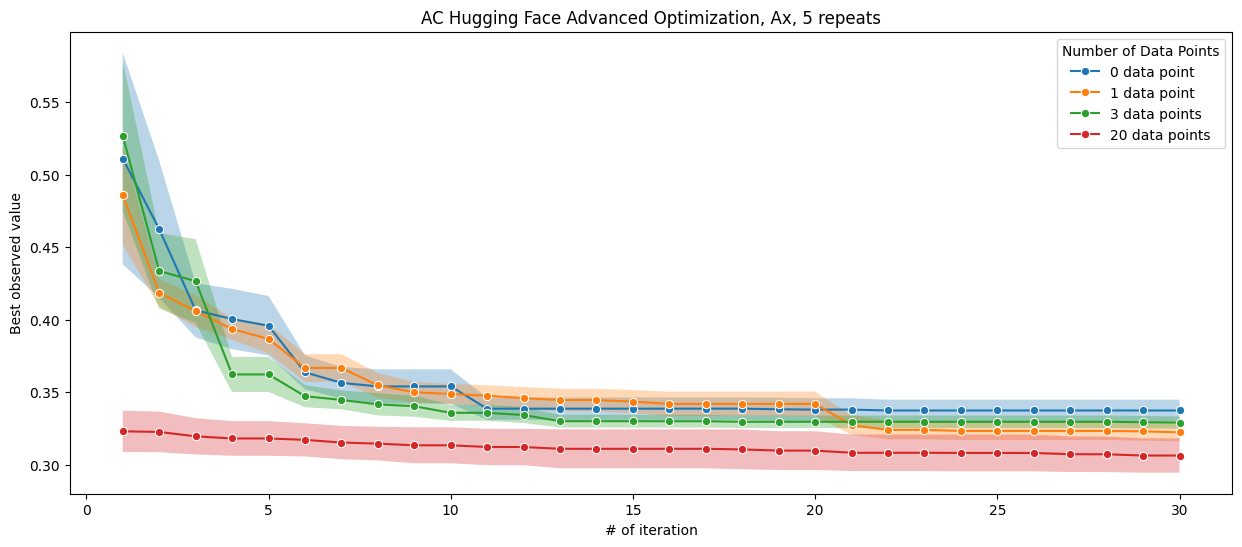

In [11]:
# use sns to plot the result
import seaborn as sns
import matplotlib.pyplot as plt

init_0 = np.loadtxt('init_0_Ax_5round.csv')
# select first 30 columns in init_0
init_0 = init_0[:, :30]
init_1 = np.loadtxt('init_1_Ax_5round.csv')
init_3 = np.loadtxt('init_3_Ax_5round.csv')
#init_5 = np.loadtxt('init_5_Ax_5round.csv')
init_20 = np.loadtxt('init_20_Ax_5round.csv')

# group the data
data_files = [init_0, init_1, init_3, init_20]
labels = ['0 data point', '1 data point', '3 data points', '20 data points']

# Create a figure
plt.figure(figsize=(15, 6))

# Iterate through each dataset and calculate cumulative minimum, mean, and std deviation
for i, data in enumerate(data_files):
    cumulative_min = np.minimum.accumulate(data, axis=1)  # Cumulative minimum along the columns
    mean = np.mean(cumulative_min, axis=0)  # Mean across the 5 repeats
    std_dev = np.std(cumulative_min, axis=0) / np.sqrt(5)
      # Standard deviation across the 5 repeats

    # Plot with seaborn
    sns.lineplot(x=range(1, len(mean) + 1), y=mean, label=labels[i], marker='o')
    plt.fill_between(range(1, len(mean) + 1), mean - std_dev, mean + std_dev, alpha=0.3)

# Customize plot
plt.title("AC Hugging Face Advanced Optimization, Ax, 5 repeats")
plt.xlabel("# of iteration")
plt.ylabel("Best observed value")
plt.legend(title="Number of Data Points")
#plt.grid(True)

# # Show plot
# plt.tight_layout()
# plt.show()